# Exploratory data analysis

### 1. Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

pd.set_option("display.float_format", "{:.1f}".format)

### 2. Exploring your data

#### a. Read cleaned data from file

In [2]:
cleaned_df = pd.read_csv("./Data/PROCESSED_heating-gas-consumption-and-cost.csv")
cleaned_df.head()

,Development Name,Borough,Location,Funding Source,Vendor Name,Revenue Month,Service Start Date,Service End Date,# days,Current Charges,Consumption (Therms)
0,ADAMS,BRONX,BLD 04,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,78293.0,136632.0
1,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,NATIONAL GRID NYC,2010-01-01,2009-12-29,2010-01-28,30,44335.2,153899.2
2,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,NATIONAL GRID NYC,2010-01-01,2009-12-29,2010-01-28,30,22034.9,76488.8
3,AMSTERDAM,MANHATTAN,BLD 02,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,95456.6,169137.0
4,AMSTERDAM AVENUE,MANHATTAN,BLD 01,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,14607.7,26301.0


#### b. How many rows and how many columns does the data have?

In [3]:
shape = cleaned_df.shape
print("The number of row:", cleaned_df.shape[0])
print("The number of column:", cleaned_df.shape[1])
if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

The number of row: 92199
The number of column: 11
Your data good!.


#### c. Type of dataset.

In [5]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92199 entries, 0 to 92198
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Development Name      92199 non-null  object 
 1   Borough               92199 non-null  object 
 2   Location              92199 non-null  object 
 3   Funding Source        92199 non-null  object 
 4   Vendor Name           92199 non-null  object 
 5   Revenue Month         92199 non-null  object 
 6   Service Start Date    92199 non-null  object 
 7   Service End Date      92199 non-null  object 
 8   # days                92199 non-null  int64  
 9   Current Charges       92199 non-null  float64
 10  Consumption (Therms)  92199 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 7.7+ MB


#### d. Convert the data type appropriately
- `Revenue Month`, `Service Start Date`, `Service End Date`: datetime

In [6]:
cleaned_df['Revenue Month'] = pd.to_datetime(cleaned_df['Revenue Month'], format='%Y-%m-%d')
cleaned_df['Service Start Date'] = pd.to_datetime(cleaned_df['Service Start Date'], format='%Y-%m-%d')
cleaned_df['Service End Date'] = pd.to_datetime(cleaned_df['Service End Date'], format='%Y-%m-%d')

#### e. Calculate all descriptive statistics
- **Mean** trung bình
- **Median** trung vị
- **Variance** phương sai
- **Standard deviation** độ lệch chuẩn
- **Coefficient of variation** (hệ số biến thiên: tỷ lệ giữa độ lệch chuẩn và trung bình)
- **Skewness** (độ lệch, độ xiên: mô tả sự biến dạng sự bất đối xứng trong một phân phối hình chuông đối xứng hay phân phối chuẩn)
- **Kurtosis** (độ nhọn: mô tả hình dạng đuôi của phân phối)
- **Moments** (đo lường định lượng mô tả hình dạng và đặc điểm của một phân phối xác suất)
- **Covariance and correlation values** (Hiệp phương sai và hệ số tương quan. Hệ số tương quan là một đo lường chuẩn hóa của hiệp phương sai, nằm trong khoảng từ -1 đến 1. Giá trị 1 cho thấy mối quan hệ tuyến tính dương hoàn hảo, -1 cho thấy mối quan hệ tuyến tính âm hoàn hảo và 0 cho thấy không có mối quan hệ tuyến tính.)

In [7]:
df_copy = cleaned_df[['# days', 'Current Charges', 'Consumption (Therms)']]
# Calculate statistical coefficients
descriptive_stats = df_copy.describe()

# Variance, standard deviations
variance = df_copy.var()
std_dev = df_copy.std()
coeff_of_variation = (std_dev / descriptive_stats.loc['mean']) * 100

# Skewness
skewness = skew(df_copy)

# Kurtosis
kurt = kurtosis(df_copy)

# Moments
moments = df_copy.apply(lambda x: (x - x.mean()).abs().mean())

# Covariance và Correlation
covariance = df_copy.cov()
correlation = df_copy.corr()

combined_stats = pd.DataFrame({
    'Mean': descriptive_stats.loc['mean'],
    'Median': descriptive_stats.loc['50%'],
    'Std Deviation': std_dev,
    'Variance': variance,
    'Coeff of Variation': coeff_of_variation,
    'Skewness': skewness,
    'Kurtosis': kurt,
    'Moments': moments
})

combined_stats = pd.concat([combined_stats, covariance.add_prefix('Cov_'), correlation.add_prefix('Corr_')], axis=1)

print(combined_stats)


                        Mean  Median  Std Deviation     Variance  \
# days                  30.6    30.0            8.8         76.6   
Current Charges      10012.6  1341.8        25583.3  654503201.7   
Consumption (Therms) 20889.1  2405.0        49320.0 2432458653.1   

                      Coeff of Variation  Skewness  Kurtosis  Moments  \
# days                              28.6      25.1    1063.1      2.3   
Current Charges                    255.5       5.9      66.7  13228.7   
Consumption (Therms)               236.1       5.3      80.7  27720.2   

                      Cov_# days  Cov_Current Charges  \
# days                      76.6              11939.5   
Current Charges          11939.5          654503201.7   
Consumption (Therms)     23630.3         1172299634.6   

                      Cov_Consumption (Therms)  Corr_# days  \
# days                                 23630.3          1.0   
Current Charges                   1172299634.6          0.1   
Consumption (The

#### f. Considering the available features within the training dataset
Xác định và phân tích mối quan hệ giữa chúng, sau đó xác định những tính năng nào trong tập dữ liệu đóng góp đáng kể cho mục tiêu giải pháp của chúng tôi. Bằng cách sử dụng tính toán và trực quan hóa, Python cho phép chúng ta tạo ma trận tương quan, đây là bảng biểu thị các hệ số tương quan giữa các biến khác nhau.

In [9]:
cleaned_df

,Development Name,Borough,Location,Funding Source,Vendor Name,Revenue Month,Service Start Date,Service End Date,# days,Current Charges,Consumption (Therms)
0,ADAMS,BRONX,BLD 04,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,78293.0,136632.0
1,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,NATIONAL GRID NYC,2010-01-01,2009-12-29,2010-01-28,30,44335.2,153899.2
2,ALBANY/ALBANY II,BROOKLYN,ALBANY BLD 04,FEDERAL,NATIONAL GRID NYC,2010-01-01,2009-12-29,2010-01-28,30,22034.9,76488.8
3,AMSTERDAM,MANHATTAN,BLD 02,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,95456.6,169137.0
4,AMSTERDAM AVENUE,MANHATTAN,BLD 01,FEDERAL,CONSOLIDATED EDISON COMPANY OF NY,2010-01-01,2009-12-24,2010-01-26,33,14607.7,26301.0
...,...,...,...,...,...,...,...,...,...,...,...
92194,WYCKOFF GARDENS,BROOKLYN,BLD 03,FEDERAL,NATIONAL GRID NYC,2021-06-01,2021-05-25,2021-06-25,31,1419.3,3615.0
92195,WYCKOFF GARDENS,BROOKLYN,BLD 03,FEDERAL,NATIONAL GRID NYC,2021-10-01,2021-09-24,2021-10-29,35,1036.3,1619.0
92196,WYCKOFF GARDENS,BROOKLYN,BLD 03,FEDERAL,NATIONAL GRID NYC,2021-11-01,2021-10-29,2021-12-01,33,2505.8,6768.0
92197,WYCKOFF GARDENS,BROOKLYN,BLD 03,FEDERAL,NATIONAL GRID NYC,2021-12-01,2021-12-21,2022-01-06,16,20992.6,50105.0


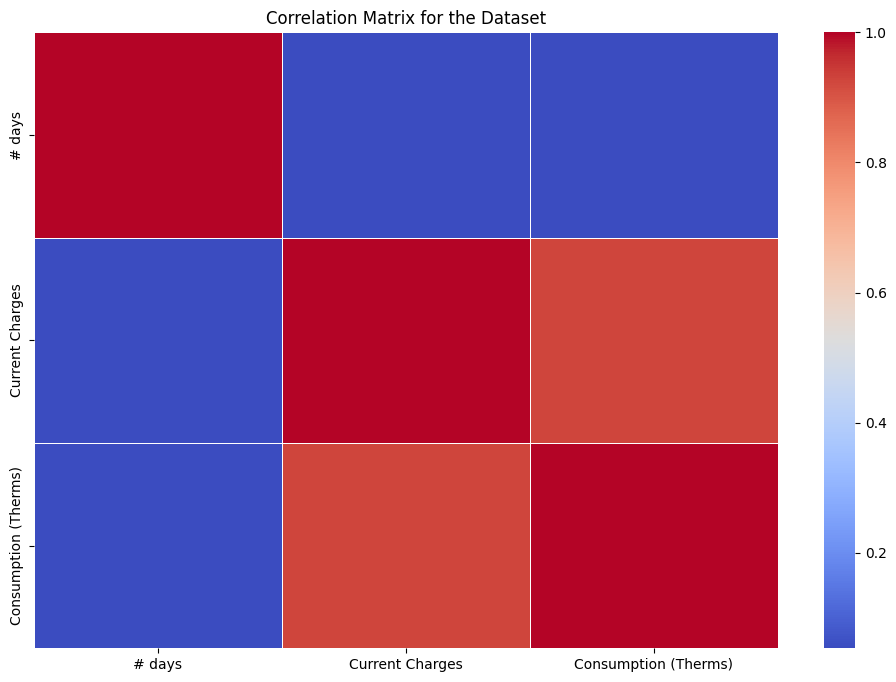

In [11]:
correlation_matrix = cleaned_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for the Dataset")
plt.show()

#### g. Categorical Variables Analysis

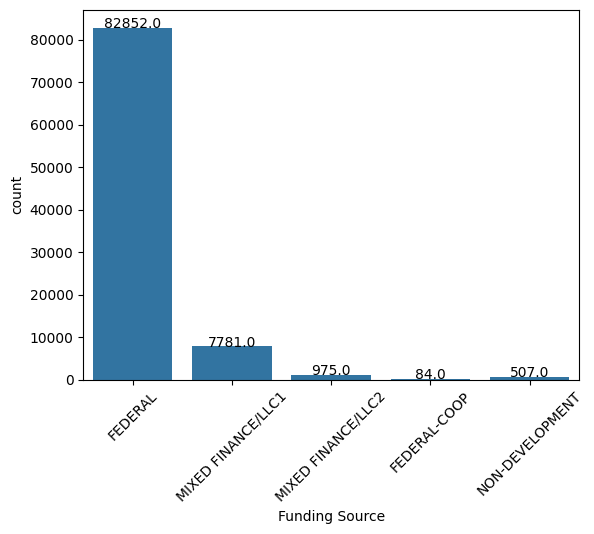

In [12]:
# Biểu đồ tần suất cho biến phân loại
ax = sns.countplot(x='Funding Source', data=cleaned_df)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

### Biểu đồ chuỗi thời gian (Time Series Plot):
Để hiểu xu hướng, biến động theo thời gian, vẽ biểu đồ chuỗi thời gian của biến số mong muốn. Với dữ liệu thời gian, biểu đồ này sẽ hiển thị thay đổi của biến theo thời gian.

#### Phân tích theo chu kỳ thời gian:
Nếu có thông tin về ngày, tiếp tục phân tích dữ liệu theo các chu kỳ thời gian khác nhau như ngày, tuần, tháng, quý, năm để xem có xu hướng, biến động nào trong dữ liệu không.

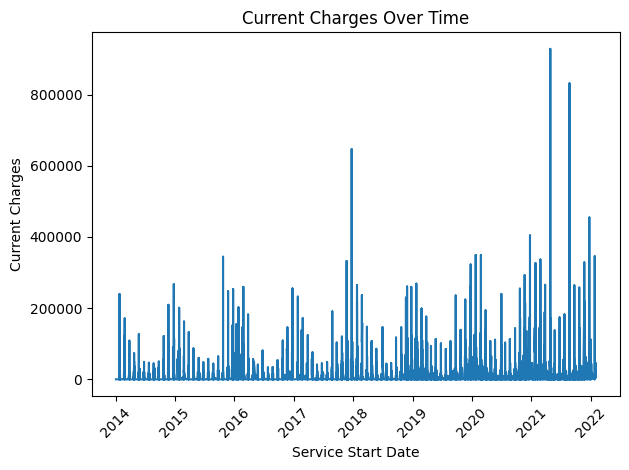

In [15]:
cleaned_df_sorted = cleaned_df.sort_values(by='Service Start Date')
cleaned_df_sorted = cleaned_df_sorted[cleaned_df_sorted['Service Start Date'].dt.year >= 2014]

plt.plot(cleaned_df_sorted['Service Start Date'], cleaned_df_sorted['Current Charges'])
plt.xlabel('Service Start Date')
plt.ylabel('Current Charges')
plt.title('Current Charges Over Time')
plt.xticks(rotation=45)  
plt.tight_layout()      
plt.show()
